In [1]:
from fujiwara_circuit import *

In [2]:
# Circuit with no position-dependent coin operator
n = 3 # number of qubits encoding the position
n_step = 1 # number of steps
n_shot = 1024 # number of iterations

qc_1 = circuit(n, n_step)

# Circuit with position-dependent coin operator
coin_list = []
Hadamard = np.array([[1,1],[1,-1]])/np.sqrt(2)
Z = np.array([[1,0],[0,-1]])
for i in range(int(pow(2,n))):
    if i % 2 == 0:
        coin_list.append(Hadamard)
    else:
        coin_list.append(Z)
        
qc_2 = circuit(n, n_step, position_dependent=True, coin_list=coin_list)

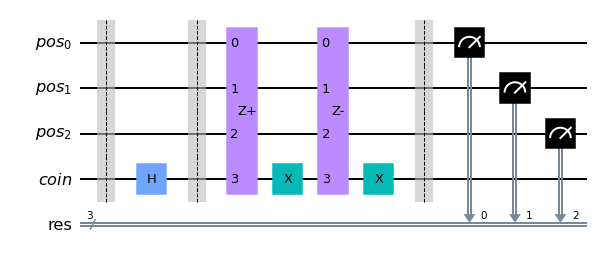

In [3]:
qc_1.draw("mpl")

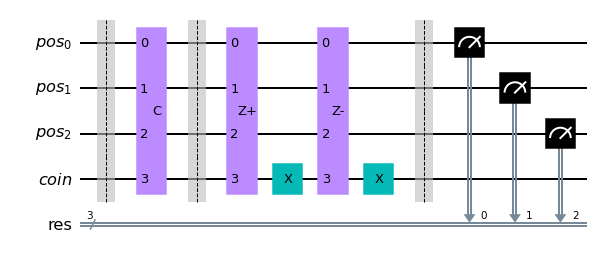

In [4]:
qc_2.draw("mpl")

In [5]:
counts_simulation_qc_1 = execute_simulation(qc_1, n_shot)
counts_simulation_qc_2 = execute_simulation(qc_2, n_shot)

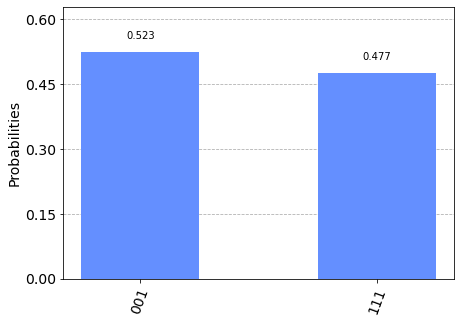

In [6]:
plot_histogram(counts_simulation_qc_1)

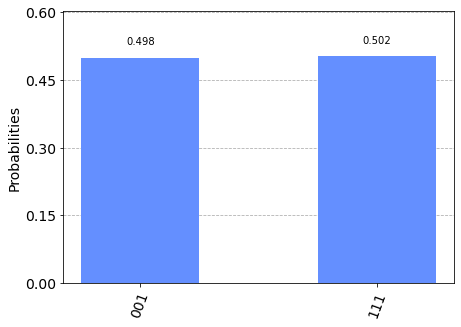

In [7]:
plot_histogram(counts_simulation_qc_2)

In [8]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [9]:
device = provider.get_backend('ibmq_manila')

In [10]:
# qc_1
job = execute(qc_1, backend=device, shots=1024)
job_monitor(job)
device_result = job.result()
counts_real_qc_1 = device_result.get_counts(qc_1)

Job Status: job has successfully run


In [12]:
# qc_2
job = execute(qc_2, backend=device, shots=1024)
job_monitor(job)
device_result = job.result()
counts_real_qc_2 = device_result.get_counts(qc_2)

Job Status: job has successfully run


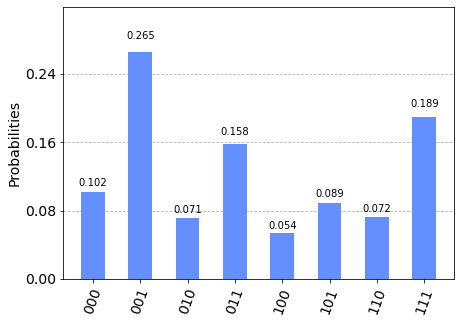

In [11]:
plot_histogram(counts_real_qc_1)

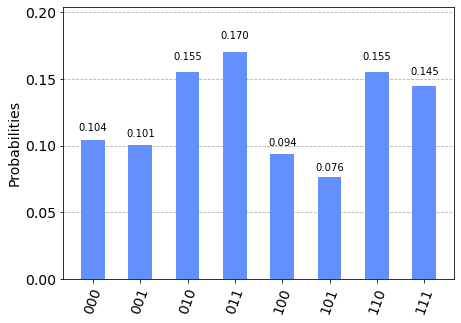

In [13]:
plot_histogram(counts_real_qc_2)

In [12]:
from fujiwara_walk import *

In [13]:
n = 8 # number of nodes (must be a power of 2)

coin = (1/np.sqrt(2)) * np.array([[1,1], [1, -1]]) # Hadamard coin

pos_init = [1,0] # the walker starts on the node 0
coin_init = [1,0] # |0>

vector = init(n, pos_init, coin_init) # state vector of the walk

vector_after_walk = quantum_walk(vector, n, coin, n_step)

prob_distrib = decode(vector_after_walk,n)

In [14]:
prob_distrib

{1: 0.4999999999999999, 7: 0.4999999999999999}

In [20]:
coin_list = []
Hadamard = np.array([[1,1],[1,-1]])/np.sqrt(2)
Z = np.array([[1,0],[0,-1]])
for i in range(n):
    if i % 2 == 0:
        coin_list.append(Hadamard)
    else:
        coin_list.append(Z)

pos_init = [1,0] # the walker starts on the node 0
coin_init = [1,0] # |0>

vector = init(n, pos_init, coin_init) # state vector of the walk

vector_after_walk = quantum_walk(vector, n, coin, n_step, position_dependent = True, coin_list = coin_list)

prob_distrib = decode(vector_after_walk,n)
prob_distrib

{1: 0.2499999999999999,
 3: 0.2499999999999999,
 5: 0.2499999999999999,
 7: 0.2499999999999999}